<a href="https://colab.research.google.com/github/Ni7070/MinimumDistanceToClassMeanClassifier/blob/main/Designing_a_Minimum_Distance_to_Class_Mean_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.txt to test (1).txt
Saving train.txt to train (1).txt


In [ ]:
#Reading Train and Test data files
import numpy as np
trainData = np.loadtxt("train.txt",dtype=int, delimiter = " ")
testData = np.loadtxt("test.txt", dtype=int, delimiter = " ")

In [ ]:
#Distributing train data into trainClass1 and trainClass2 based on the data of the last column
trainClass1 = trainData[np.where(trainData[:,-1]==1)]

trainClass2 = trainData[np.where(trainData[:,-1]==2)]


print('çlass1=  ',trainClass1)
print('çlass2=  ',trainClass2)

çlass1=   [[ 2  2  1]
 [ 3  1  1]
 [ 3  3  1]
 [-1 -3  1]
 [ 4  2  1]
 [-2 -2  1]]
çlass2=   [[-4  3  2]
 [ 2  6  2]
 [ 0  0  2]
 [-2  2  2]
 [-1 -1  2]
 [-4  2  2]]


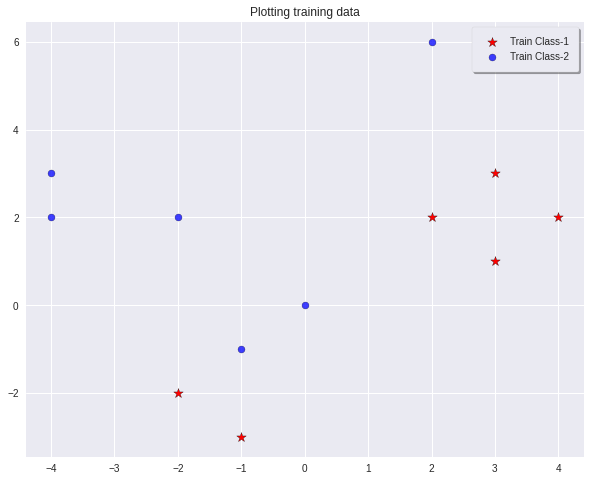

In [ ]:
#Plotting train data
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize = (10, 8))


plt.scatter(trainClass1[:,0], trainClass1[:,1], c = 'red', marker='*', s= 100, label='Train Class-1', edgecolors='black')
plt.scatter(trainClass2[:,0], trainClass2[:,1], c = 'blue', label='Train Class-2', edgecolors='black', alpha=0.75)

plt.title("Plotting training data")
ax.legend(frameon=True, shadow=True, borderpad=1)


plt.show()

In [ ]:
#finding the mean of class 1
meanOfClass1 = [np.mean(trainClass1[:,0]),np.mean(trainClass1[:,1])]
meanOfClass1 = np.matrix(meanOfClass1)

#finding the mean of class 2
meanOfClass2 = [np.mean(trainClass2[:,0]),np.mean(trainClass2[:,1])]
meanOfClass2 = np.matrix(meanOfClass2)

In [ ]:
#converting the test dara in a matrix form
testData = np.asmatrix(testData)
#taking the first two column of test data and assigning them in to convertedData
covertedTestData =  testData[:, [0,1]]
#taking the first last column of test data and assigning them in to givenClassOfData
givenClassOfTestData = testData[:,[2]]

In [ ]:
#Distributing test data into testClass1 and testClass2 based on the given data of the last column
testClass1 = testData[np.where(testData[:,-1]==1)]

testClass2 = testData[np.where(testData[:,-1]==2)]

In [ ]:
#classify test data using the minimum distance to class mean classifier
class1FromTestData = np.empty((0,2))
class2FromTestData = np.zeros((0,2))
foundClassOfTestData = [] 

for i in range(len(testData)):
  g1 = np.dot(meanOfClass1, covertedTestData[i].transpose()) - (0.5 * np.dot(meanOfClass1, meanOfClass1.transpose()))
  g2 = np.dot(meanOfClass2, covertedTestData[i].transpose()) - (0.5 * np.dot(meanOfClass2, meanOfClass2.transpose()))
  if g1 > g2:
    class1FromTestData = np.append(class1FromTestData, [[covertedTestData[i].item(0), covertedTestData[i].item(1)]], axis=0)
    foundClassOfTestData.append(1) 
  else:
    class2FromTestData = np.append(class2FromTestData, [[covertedTestData[i].item(0), covertedTestData[i].item(1)]],  axis=0)
    foundClassOfTestData.append(2)

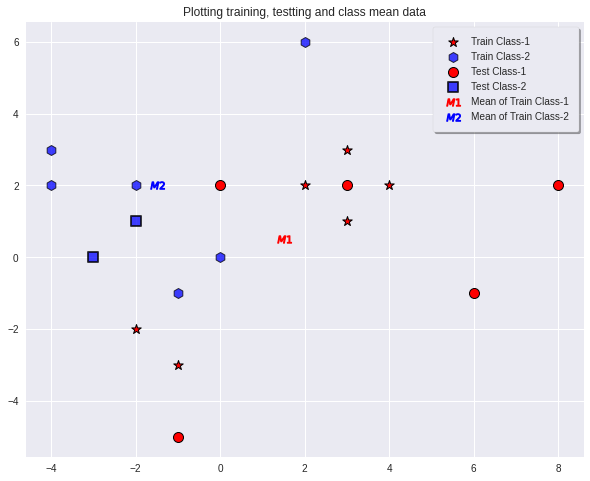

In [ ]:
#plotting data 
fig, axes = plt.subplots(1, figsize = (10, 8))
plt.title("Plotting training, testting and class mean data")


#plotting train data
plt.scatter(trainClass1[:,0], trainClass1[:,1], c = 'red', marker='*', s= 100, label='Train Class-1', edgecolors='black', linewidths=1)
plt.scatter(trainClass2[:,0], trainClass2[:,1], c = 'blue', marker='h', s= 100, label='Train Class-2', edgecolors='black', alpha=0.75, linewidths=1)

#plotting test data 
plt.scatter([testClass1[:,0]], [testClass1[:,1]], c = 'red', marker='o', s= 100, label='Test Class-1', edgecolors='black', linewidths=1)
plt.scatter([testClass2[:,0]], [testClass2[:,1]], c = 'blue', marker='s',s= 100, label='Test Class-2', edgecolors='black', alpha=0.75, linewidths=2)


#plotting mean of train data
plt.scatter(meanOfClass1[0,0], meanOfClass1[0,1], c = 'red', marker='$M1$', s= 200, label='Mean of Train Class-1', linewidths=1)
plt.scatter(meanOfClass2[0,0], meanOfClass2[0,1], c = 'blue', marker='$M2$',s= 200, label='Mean of Train Class-2', linewidths=1)

plt.legend(loc = 'best')
axes.legend(frameon=True, shadow=True, borderpad=1)
plt.show()

In [ ]:
#Generating the Decesion Boundary for a minimum distance to class mean classifier
X=[]
Y=[]

mc1 = np.asarray(meanOfClass1).flatten()
mc2 = np.asarray(meanOfClass2).flatten()

for i in range(-4,8,1):
    j= -((mc1[0]-mc2[0])*i- 0.5*((np.dot(np.transpose(mc1),mc1)) - (np.dot(np.transpose(mc2),mc2))))/(mc1[1]-mc2[1])

    X.append(i)
    Y.append(j)  

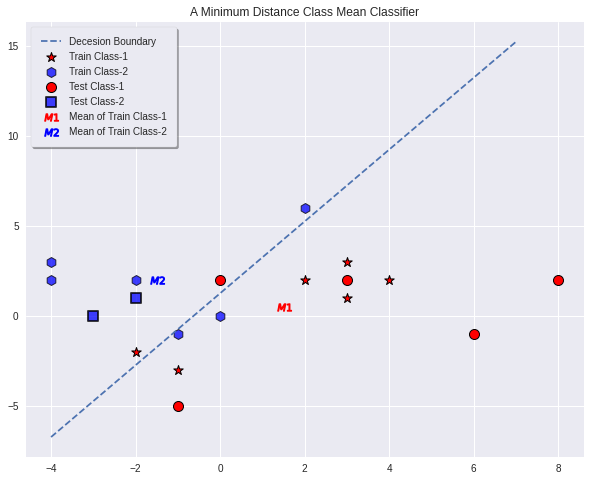

In [ ]:
fig, ax = plt.subplots(1, figsize = (10, 8))

ax.plot(X,Y,"--", label='Decesion Boundary')

plt.title("A Minimum Distance Class Mean Classifier")


#train data
ax.scatter(trainClass1[:,0], trainClass1[:,1], c = 'red', marker='*', s= 100, label='Train Class-1', edgecolors='black', linewidths=1)
ax.scatter(trainClass2[:,0], trainClass2[:,1], c = 'blue', marker='h', s= 100, label='Train Class-2', edgecolors='black', alpha=0.75, linewidths=1)

#test data
ax.scatter([testClass1[:,0]], [testClass1[:,1]], c = 'red', marker='o', s= 100, label='Test Class-1', edgecolors='black', linewidths=1)
ax.scatter([testClass2[:,0]], [testClass2[:,1]], c = 'blue', marker='s',s= 100, label='Test Class-2', edgecolors='black', alpha=0.75, linewidths=2)
#mean of train data
ax.scatter(meanOfClass1[0,0], meanOfClass1[0,1], c = 'red', marker='$M1$', s= 200, label='Mean of Train Class-1', linewidths=1)
ax.scatter(meanOfClass2[0,0], meanOfClass2[0,1], c = 'blue', marker='$M2$',s= 200, label='Mean of Train Class-2', linewidths=1)


ax.legend(frameon=True, shadow=True, borderpad=1)
plt.show()

In [ ]:
#calculating accuracy
accuracy = 0

for i, j in zip(givenClassOfTestData, foundClassOfTestData):
  if i == j:
    accuracy = accuracy + 1

accuracy = (accuracy/len(givenClassOfTestData))*100 

print(accuracy)

85.71428571428571
